## This portion is just for loading of models and trying out the Facial Expression Prediction.

In [2]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to upload an image file
def upload_image():
    Tk().withdraw()  # Prevents Tkinter window from appearing
    filename = askopenfilename()  # Open dialog to choose file
    return filename

# Image Processing
Function that loads the image and returns two values, the original color image and the grayscale version of the image.

In [5]:
# Function to load and process the image
def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

### Load your model here, ensure model is in the same directory as this file.

In [7]:
# Load the model
model = load_model('best_model.keras')

In [8]:
# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

### Load your Image here, ensure image is in the same directory as this file and image file type is enter correctly.

In [203]:
# Load the image
image_path = 'mimo.jpg'

In [205]:
# Load and process the image
image, gray = process_image(image_path)

# Function to detect faces in a grayscale image using OpenCV

In [208]:
# Detect faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

Process for each detected face in that image and predicts the emotion, then it;ll draw a square around the predicted emotion label.

In [211]:
for (x, y, w, h) in faces:
    roi_gray = gray[y:y + h, x:x + w]  #Extracts the Region Of Interest to that detected face from the grayscale image.
    roi_gray = cv2.resize(roi_gray, (48, 48))  #Resize the extracted region to 48x48 pixels, the expected size for the Facial Recognition Model.
    roi_gray = roi_gray.astype('float32') / 255.0  #Normalise pixel values by converting to float32 and divide by 255
    roi_gray = np.expand_dims(roi_gray, axis=0)  
    roi_gray = np.expand_dims(roi_gray, axis=-1)

    prediction = model.predict(roi_gray)  #Use the trained model to predict the Facial Expression base on the region
    max_index = int(np.argmax(prediction))  #Find highest index of predicted probability that corresponds to the emotion
    emotion = emotion_labels[max_index]  #Maps the index to the corresponding emotion

    print(f"Predicted emotion: {emotion}") 

    # Draw rectangle and emotion label on the image with green color
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  #Green rectangle around the detected face.
    text_size, _ = cv2.getTextSize(emotion, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 2)
    text_width, text_height = text_size
    cv2.putText(image, emotion, (x, y - 10 if y - 10 > 10 else y + h + text_height), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Green text


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted emotion: Happy


In [213]:
# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

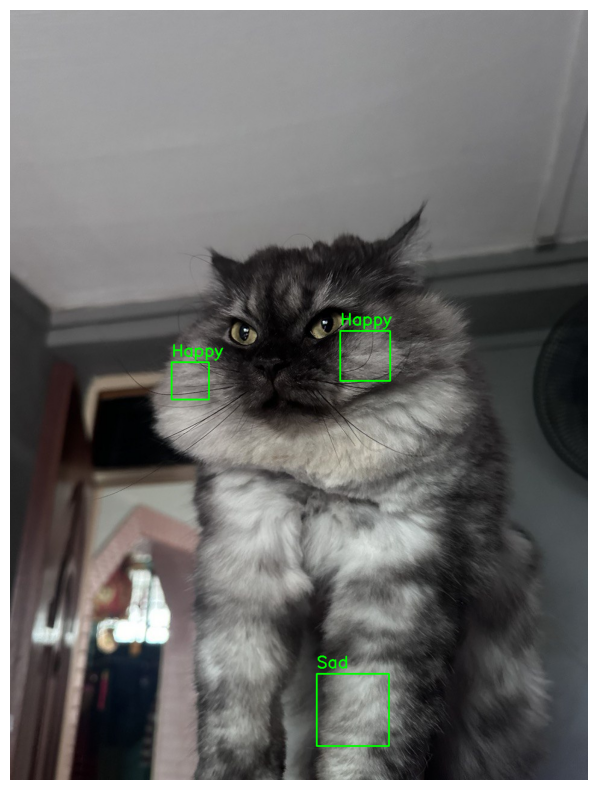

In [215]:
# Display the image with matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [217]:
print(f'Original shape of the Image: {image.shape}') #Understand the shape of the image

Original shape of the Image: (1280, 960, 3)


In [219]:
# Resize the image to 5x5 pixels 
new_size = (5, 5)
resized_image = cv2.resize(image, new_size)
print(f'new shape: {resized_image.shape}')
print(f'BGR format: \n {resized_image}') #OpenCV uses BGR instead of RGB

new shape: (5, 5, 3)
BGR format: 
 [[[163 162 162]
  [160 158 158]
  [154 154 154]
  [139 139 139]
  [125 123 123]]

 [[145 144 146]
  [143 142 144]
  [127 130 131]
  [100 100 100]
  [ 92  94  94]]

 [[ 23  25  47]
  [141 144 150]
  [ 33  34  37]
  [105 109 109]
  [ 52  53  49]]

 [[ 28  29  40]
  [108 113 139]
  [153 156 156]
  [167 169 165]
  [ 73  74  73]]

 [[118 129 147]
  [143 143 155]
  [ 61  63  63]
  [ 49  49  49]
  [ 81  80  80]]]
